# Cats vs. Dogs Image Classification

## Objective 

To classify between images of cats and dogs based on the given train set and test set images.

## Approach

* Using CNN.
* Keras is used as the High level API.

## Data

Kaggle: https://www.kaggle.com/c/dogs-vs-cats/overview

## Data and Image Analysis

* For now, let's visualize one of the images.

In [4]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img

In [52]:
print(os.listdir()) 

['.ipynb_checkpoints', 'cats_vs_dogs.ipynb', 'cats_vs_dogs1.h5', 'cats_vs_dogs2.h5', 'test1', 'test1.zip', 'test_gen', 'train', 'train.zip', 'train_gen', 'Untitled.ipynb', 'validation_gen']


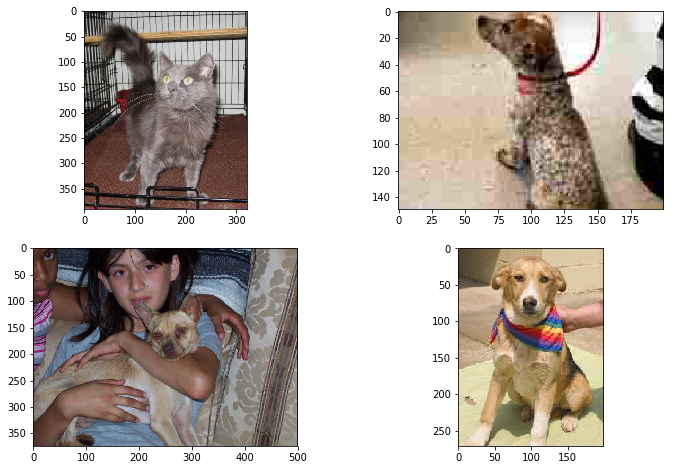

In [53]:
train_files = os.listdir('train')

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(220 + i + 1)
    sample_image = random.choice(train_files)
    image = load_img('train/' + sample_image)
    plt.imshow(image)

* It is clearly visible that all the images do not have the same size.
* We will have to do some pre-processing before we can move further into building and training the model.

In [54]:
# counting the number of cat and dog images
cat_count = 0
dog_count = 0

files = os.listdir('train')

for name in files:
    animal = name.split('.')[0]
    if animal == 'cat':
        cat_count += 1
    else:
        dog_count += 1
        
print('Cat images: ', cat_count)
print('Dog images: ', dog_count)

Cat images:  12500
Dog images:  12500


So, we have 12500 photos of cats and 12500 photos of dogs.

## Separating the Cats and Dogs Images

In [55]:
# training data directory
train_dir = 'train_gen'

# validation data directory
val_dir = 'validation_gen'

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
    
if not os.path.exists(val_dir):
    os.makedirs(val_dir)
    
train_dir_cats = os.path.join(train_dir, 'train_cats')
train_dir_dogs = os.path.join(train_dir, 'train_dogs')

if not os.path.exists(train_dir_cats):
    os.makedirs(train_dir_cats)
    
if not os.path.exists(train_dir_dogs):
    os.makedirs(train_dir_dogs)
    
val_dir_cats = os.path.join(val_dir, 'val_cats')
val_dir_dogs = os.path.join(val_dir, 'val_dogs')

if not os.path.exists(val_dir_cats):
    os.makedirs(val_dir_cats)
    
if not os.path.exists(val_dir_dogs):
    os.makedirs(val_dir_dogs)

The above block of code creates a test directory and a validation directory where will be copying the images from the original training folder only. We will be using 10000 images each (cats and dogs) for training and 1500 images for validtaion. This way we can analyze our model before we do the final testing on the test set.

In [56]:
# copying the images
from tqdm import tqdm
import shutil
from shutil import copyfile

initial_dir = 'train'

# cat images for training directory
names = ['cat.{}.jpg'.format(i) for i in range(10000)]
for name in tqdm(names):
    src = os.path.join(initial_dir, name)
    dst = os.path.join(train_dir_cats, name)
    shutil.copyfile(src, dst)
    
# cat images for validation directory
names = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for name in tqdm(names):
    src = os.path.join(initial_dir, name)
    dst = os.path.join(val_dir_cats, name)
    shutil.copyfile(src, dst)
    
# dog images for training directory
names = ['dog.{}.jpg'.format(i) for i in range(10000)]
for name in tqdm(names):
    src = os.path.join(initial_dir, name)
    dst = os.path.join(train_dir_dogs, name)
    shutil.copyfile(src, dst)
    
# dog images for validation directory
names = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for name in tqdm(names):
    src = os.path.join(initial_dir, name)
    dst = os.path.join(val_dir_dogs, name)
    shutil.copyfile(src, dst)

100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:24<00:00, 102.71it/s]


## Preparing the Data

The photos are in JPG formats. We need vectorize them (convert into tensors) so that they can be fed into a neural network, like converting them into RGB values.

One more thing that we can is rescale the values between 0 to 255 (RGB values) to 0 to 1. 

In [57]:
# rescaling and converting all the train images 
train_data = ImageDataGenerator(rescale=1.0 / 255)

train_gen_pipe = train_data.flow_from_directory(train_dir,
                        target_size=(150, 150),
                        batch_size=100,
                        class_mode='binary')

# rescaling and converting all the validation images
val_data = ImageDataGenerator(rescale=1.0 / 255)

val_gen_pipe = val_data.flow_from_directory(val_dir,
                                           target_size=(150, 150),
                                           batch_size=100,
                                           class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Building the Model

In [58]:
from keras import layers 
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', 
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [59]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Compiling the Model

In [60]:
model.compile(loss='binary_crossentropy',
             optimizer='RMSprop',
             metrics=['acc'])

## Fitting the Model

We will be using the `History` object so as to record the training events. Also, as the images go go through pre-preocessing, instead of `fit`, `fit_generator` is used.  

In [61]:
history = model.fit_generator(train_gen_pipe,
                   steps_per_epoch=100,
                   epochs=50,
                   validation_data=val_gen_pipe,
                   validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
100/100 [==============================] - ETA: 5:28 - loss: 0.6965 - acc: 0.430 - ETA: 2:51 - loss: 4.2616 - acc: 0.440 - ETA: 1:59 - loss: 3.0734 - acc: 0.450 - ETA: 1:33 - loss: 2.5238 - acc: 0.457 - ETA: 1:17 - loss: 2.1551 - acc: 0.476 - ETA: 1:06 - loss: 1.9131 - acc: 0.475 - ETA: 59s - loss: 1.7388 - acc: 0.481 - ETA: 53s - loss: 1.6079 - acc: 0.48 - ETA: 48s - loss: 1.5056 - acc: 0.49 - ETA: 45s - loss: 1.4255 - acc: 0.49 - ETA: 42s - loss: 1.3591 - acc: 0.49 - ETA: 39s - loss: 1.3034 - acc: 0.49 - ETA: 37s - loss: 1.2563 - acc: 0.49 - ETA: 35s - loss: 1.2161 - acc: 0.49 - ETA: 33s - loss: 1.1809 - acc: 0.49 - ETA: 32s - loss: 1.1503 - acc: 0.50 - ETA: 31s - loss: 1.1233 - acc: 0.50 - ETA: 29s - loss: 1.0993 - acc: 0.50 - ETA: 28s - loss: 1.0777 - acc: 0.50 - ETA: 27s - loss: 1.0580 - acc: 0.50 - ETA: 26s - loss: 1.0398 - acc: 0.51 - ETA: 25s - loss: 1.0277 - acc: 0.51 - ETA: 25s - loss: 1.0129 - acc: 0.51 - ETA: 24s - 

100/100 [==============================] - ETA: 18s - loss: 0.4363 - acc: 0.84 - ETA: 18s - loss: 0.4520 - acc: 0.79 - ETA: 18s - loss: 0.4801 - acc: 0.76 - ETA: 18s - loss: 0.4689 - acc: 0.77 - ETA: 18s - loss: 0.4973 - acc: 0.76 - ETA: 18s - loss: 0.5170 - acc: 0.75 - ETA: 18s - loss: 0.5412 - acc: 0.72 - ETA: 17s - loss: 0.5422 - acc: 0.73 - ETA: 17s - loss: 0.5385 - acc: 0.73 - ETA: 17s - loss: 0.5242 - acc: 0.75 - ETA: 17s - loss: 0.5144 - acc: 0.75 - ETA: 17s - loss: 0.5181 - acc: 0.76 - ETA: 16s - loss: 0.5104 - acc: 0.76 - ETA: 16s - loss: 0.5029 - acc: 0.76 - ETA: 16s - loss: 0.4958 - acc: 0.77 - ETA: 16s - loss: 0.4992 - acc: 0.77 - ETA: 16s - loss: 0.5006 - acc: 0.77 - ETA: 15s - loss: 0.4990 - acc: 0.77 - ETA: 15s - loss: 0.4987 - acc: 0.77 - ETA: 15s - loss: 0.4969 - acc: 0.77 - ETA: 15s - loss: 0.4970 - acc: 0.77 - ETA: 15s - loss: 0.5037 - acc: 0.76 - ETA: 14s - loss: 0.5051 - acc: 0.76 - ETA: 14s - loss: 0.5075 - acc: 0.76 - ETA: 14s - loss: 0.5045 - acc: 0.76 - ETA: 14

100/100 [==============================] - ETA: 19s - loss: 0.2864 - acc: 0.89 - ETA: 18s - loss: 0.2826 - acc: 0.87 - ETA: 18s - loss: 0.2920 - acc: 0.86 - ETA: 18s - loss: 0.3138 - acc: 0.84 - ETA: 18s - loss: 0.3195 - acc: 0.83 - ETA: 18s - loss: 0.3155 - acc: 0.84 - ETA: 18s - loss: 0.3156 - acc: 0.85 - ETA: 17s - loss: 0.3159 - acc: 0.85 - ETA: 17s - loss: 0.3013 - acc: 0.86 - ETA: 17s - loss: 0.3032 - acc: 0.86 - ETA: 17s - loss: 0.2973 - acc: 0.86 - ETA: 17s - loss: 0.3018 - acc: 0.86 - ETA: 16s - loss: 0.3087 - acc: 0.86 - ETA: 16s - loss: 0.3070 - acc: 0.86 - ETA: 16s - loss: 0.3174 - acc: 0.85 - ETA: 16s - loss: 0.3494 - acc: 0.84 - ETA: 16s - loss: 0.3537 - acc: 0.84 - ETA: 15s - loss: 0.3570 - acc: 0.84 - ETA: 15s - loss: 0.3564 - acc: 0.84 - ETA: 15s - loss: 0.3549 - acc: 0.84 - ETA: 15s - loss: 0.3544 - acc: 0.84 - ETA: 15s - loss: 0.3521 - acc: 0.84 - ETA: 14s - loss: 0.3487 - acc: 0.84 - ETA: 14s - loss: 0.3407 - acc: 0.85 - ETA: 14s - loss: 0.3371 - acc: 0.85 - ETA: 14

100/100 [==============================] - ETA: 19s - loss: 0.3617 - acc: 0.87 - ETA: 19s - loss: 0.3243 - acc: 0.88 - ETA: 19s - loss: 0.2808 - acc: 0.89 - ETA: 18s - loss: 0.2659 - acc: 0.89 - ETA: 18s - loss: 0.2518 - acc: 0.89 - ETA: 18s - loss: 0.2478 - acc: 0.89 - ETA: 18s - loss: 0.2500 - acc: 0.89 - ETA: 18s - loss: 0.2614 - acc: 0.88 - ETA: 17s - loss: 0.2696 - acc: 0.87 - ETA: 17s - loss: 0.2614 - acc: 0.88 - ETA: 17s - loss: 0.2586 - acc: 0.88 - ETA: 17s - loss: 0.2608 - acc: 0.88 - ETA: 17s - loss: 0.2543 - acc: 0.89 - ETA: 16s - loss: 0.2556 - acc: 0.88 - ETA: 16s - loss: 0.2568 - acc: 0.88 - ETA: 16s - loss: 0.2560 - acc: 0.88 - ETA: 16s - loss: 0.2543 - acc: 0.88 - ETA: 16s - loss: 0.2577 - acc: 0.88 - ETA: 15s - loss: 0.2556 - acc: 0.88 - ETA: 15s - loss: 0.2487 - acc: 0.89 - ETA: 15s - loss: 0.2474 - acc: 0.89 - ETA: 15s - loss: 0.2498 - acc: 0.89 - ETA: 15s - loss: 0.2495 - acc: 0.88 - ETA: 14s - loss: 0.2465 - acc: 0.89 - ETA: 14s - loss: 0.2463 - acc: 0.89 - ETA: 14

100/100 [==============================] - ETA: 18s - loss: 0.1325 - acc: 0.95 - ETA: 18s - loss: 0.1126 - acc: 0.96 - ETA: 18s - loss: 0.0992 - acc: 0.96 - ETA: 18s - loss: 0.1099 - acc: 0.96 - ETA: 18s - loss: 0.1039 - acc: 0.96 - ETA: 18s - loss: 0.1099 - acc: 0.95 - ETA: 18s - loss: 0.1180 - acc: 0.95 - ETA: 17s - loss: 0.1205 - acc: 0.95 - ETA: 17s - loss: 0.1186 - acc: 0.95 - ETA: 17s - loss: 0.1188 - acc: 0.95 - ETA: 17s - loss: 0.1159 - acc: 0.95 - ETA: 17s - loss: 0.1108 - acc: 0.96 - ETA: 16s - loss: 0.1080 - acc: 0.96 - ETA: 16s - loss: 0.1122 - acc: 0.96 - ETA: 16s - loss: 0.1151 - acc: 0.95 - ETA: 16s - loss: 0.1209 - acc: 0.95 - ETA: 16s - loss: 0.1247 - acc: 0.95 - ETA: 15s - loss: 0.1263 - acc: 0.95 - ETA: 15s - loss: 0.1262 - acc: 0.95 - ETA: 15s - loss: 0.1248 - acc: 0.95 - ETA: 15s - loss: 0.1244 - acc: 0.95 - ETA: 15s - loss: 0.1317 - acc: 0.95 - ETA: 14s - loss: 0.1437 - acc: 0.94 - ETA: 14s - loss: 0.1456 - acc: 0.94 - ETA: 14s - loss: 0.1472 - acc: 0.94 - ETA: 14

100/100 [==============================] - ETA: 18s - loss: 0.2963 - acc: 0.86 - ETA: 18s - loss: 0.2700 - acc: 0.85 - ETA: 18s - loss: 0.2124 - acc: 0.89 - ETA: 18s - loss: 0.1750 - acc: 0.91 - ETA: 18s - loss: 0.1426 - acc: 0.93 - ETA: 18s - loss: 0.1234 - acc: 0.94 - ETA: 18s - loss: 0.1137 - acc: 0.94 - ETA: 17s - loss: 0.1052 - acc: 0.95 - ETA: 17s - loss: 0.1016 - acc: 0.95 - ETA: 17s - loss: 0.0988 - acc: 0.95 - ETA: 17s - loss: 0.0957 - acc: 0.95 - ETA: 17s - loss: 0.0918 - acc: 0.96 - ETA: 16s - loss: 0.0912 - acc: 0.96 - ETA: 16s - loss: 0.0920 - acc: 0.96 - ETA: 16s - loss: 0.0910 - acc: 0.96 - ETA: 16s - loss: 0.0877 - acc: 0.96 - ETA: 16s - loss: 0.0880 - acc: 0.96 - ETA: 15s - loss: 0.0844 - acc: 0.96 - ETA: 15s - loss: 0.0841 - acc: 0.96 - ETA: 15s - loss: 0.0849 - acc: 0.96 - ETA: 15s - loss: 0.0829 - acc: 0.96 - ETA: 15s - loss: 0.0798 - acc: 0.96 - ETA: 14s - loss: 0.0782 - acc: 0.96 - ETA: 14s - loss: 0.0759 - acc: 0.96 - ETA: 14s - loss: 0.0747 - acc: 0.96 - ETA: 14

100/100 [==============================] - ETA: 19s - loss: 0.0266 - acc: 0.99 - ETA: 18s - loss: 0.0669 - acc: 0.97 - ETA: 18s - loss: 0.0584 - acc: 0.97 - ETA: 18s - loss: 0.0554 - acc: 0.98 - ETA: 18s - loss: 0.0503 - acc: 0.98 - ETA: 18s - loss: 0.0463 - acc: 0.98 - ETA: 17s - loss: 0.0482 - acc: 0.98 - ETA: 17s - loss: 0.0508 - acc: 0.98 - ETA: 17s - loss: 0.0532 - acc: 0.98 - ETA: 17s - loss: 0.0572 - acc: 0.97 - ETA: 17s - loss: 0.0596 - acc: 0.97 - ETA: 17s - loss: 0.0608 - acc: 0.97 - ETA: 16s - loss: 0.0640 - acc: 0.97 - ETA: 16s - loss: 0.0619 - acc: 0.97 - ETA: 16s - loss: 0.0591 - acc: 0.97 - ETA: 16s - loss: 0.0588 - acc: 0.97 - ETA: 16s - loss: 0.0576 - acc: 0.97 - ETA: 15s - loss: 0.0562 - acc: 0.97 - ETA: 15s - loss: 0.0561 - acc: 0.97 - ETA: 15s - loss: 0.0537 - acc: 0.98 - ETA: 15s - loss: 0.0516 - acc: 0.98 - ETA: 15s - loss: 0.0493 - acc: 0.98 - ETA: 14s - loss: 0.0480 - acc: 0.98 - ETA: 14s - loss: 0.0470 - acc: 0.98 - ETA: 14s - loss: 0.0473 - acc: 0.98 - ETA: 14

100/100 [==============================] - ETA: 19s - loss: 0.1430 - acc: 0.94 - ETA: 19s - loss: 0.1026 - acc: 0.95 - ETA: 18s - loss: 0.0801 - acc: 0.96 - ETA: 18s - loss: 0.0640 - acc: 0.97 - ETA: 18s - loss: 0.0530 - acc: 0.97 - ETA: 18s - loss: 0.0448 - acc: 0.98 - ETA: 18s - loss: 0.0402 - acc: 0.98 - ETA: 17s - loss: 0.0421 - acc: 0.98 - ETA: 17s - loss: 0.0420 - acc: 0.98 - ETA: 17s - loss: 0.0395 - acc: 0.98 - ETA: 17s - loss: 0.0395 - acc: 0.98 - ETA: 17s - loss: 0.0377 - acc: 0.98 - ETA: 16s - loss: 0.0369 - acc: 0.98 - ETA: 16s - loss: 0.0364 - acc: 0.98 - ETA: 16s - loss: 0.0347 - acc: 0.98 - ETA: 16s - loss: 0.0363 - acc: 0.98 - ETA: 16s - loss: 0.0370 - acc: 0.98 - ETA: 15s - loss: 0.0375 - acc: 0.98 - ETA: 15s - loss: 0.0385 - acc: 0.98 - ETA: 15s - loss: 0.0367 - acc: 0.98 - ETA: 15s - loss: 0.0357 - acc: 0.98 - ETA: 15s - loss: 0.0342 - acc: 0.98 - ETA: 14s - loss: 0.0330 - acc: 0.98 - ETA: 14s - loss: 0.0319 - acc: 0.98 - ETA: 14s - loss: 0.0316 - acc: 0.98 - ETA: 14

100/100 [==============================] - ETA: 19s - loss: 0.0012 - acc: 1.00 - ETA: 19s - loss: 0.0011 - acc: 1.00 - ETA: 18s - loss: 0.0035 - acc: 1.00 - ETA: 18s - loss: 0.0084 - acc: 0.99 - ETA: 18s - loss: 0.0383 - acc: 0.99 - ETA: 18s - loss: 0.0693 - acc: 0.98 - ETA: 18s - loss: 0.1098 - acc: 0.97 - ETA: 17s - loss: 0.1262 - acc: 0.96 - ETA: 17s - loss: 0.1340 - acc: 0.96 - ETA: 17s - loss: 0.1265 - acc: 0.96 - ETA: 17s - loss: 0.1183 - acc: 0.96 - ETA: 17s - loss: 0.1104 - acc: 0.96 - ETA: 16s - loss: 0.1043 - acc: 0.97 - ETA: 16s - loss: 0.1004 - acc: 0.97 - ETA: 16s - loss: 0.0944 - acc: 0.97 - ETA: 16s - loss: 0.0891 - acc: 0.97 - ETA: 16s - loss: 0.0840 - acc: 0.97 - ETA: 15s - loss: 0.0809 - acc: 0.97 - ETA: 15s - loss: 0.0769 - acc: 0.97 - ETA: 15s - loss: 0.0760 - acc: 0.97 - ETA: 15s - loss: 0.0731 - acc: 0.97 - ETA: 15s - loss: 0.0703 - acc: 0.97 - ETA: 14s - loss: 0.0674 - acc: 0.98 - ETA: 14s - loss: 0.0648 - acc: 0.98 - ETA: 14s - loss: 0.0626 - acc: 0.98 - ETA: 14

100/100 [==============================] - ETA: 18s - loss: 0.1580 - acc: 0.99 - ETA: 18s - loss: 0.1125 - acc: 0.98 - ETA: 18s - loss: 0.1048 - acc: 0.97 - ETA: 18s - loss: 0.2136 - acc: 0.96 - ETA: 18s - loss: 0.2240 - acc: 0.95 - ETA: 18s - loss: 0.2144 - acc: 0.95 - ETA: 18s - loss: 0.1883 - acc: 0.95 - ETA: 17s - loss: 0.1667 - acc: 0.96 - ETA: 17s - loss: 0.1490 - acc: 0.96 - ETA: 17s - loss: 0.1343 - acc: 0.97 - ETA: 17s - loss: 0.1230 - acc: 0.97 - ETA: 17s - loss: 0.1178 - acc: 0.97 - ETA: 16s - loss: 0.1105 - acc: 0.97 - ETA: 16s - loss: 0.1047 - acc: 0.97 - ETA: 16s - loss: 0.0981 - acc: 0.97 - ETA: 16s - loss: 0.0938 - acc: 0.97 - ETA: 16s - loss: 0.0906 - acc: 0.97 - ETA: 15s - loss: 0.0880 - acc: 0.97 - ETA: 15s - loss: 0.0845 - acc: 0.97 - ETA: 15s - loss: 0.0817 - acc: 0.97 - ETA: 15s - loss: 0.0786 - acc: 0.97 - ETA: 15s - loss: 0.0753 - acc: 0.97 - ETA: 14s - loss: 0.0725 - acc: 0.98 - ETA: 14s - loss: 0.0696 - acc: 0.98 - ETA: 14s - loss: 0.0723 - acc: 0.98 - ETA: 14

100/100 [==============================] - ETA: 19s - loss: 0.0037 - acc: 1.00 - ETA: 18s - loss: 0.0030 - acc: 1.00 - ETA: 18s - loss: 0.0022 - acc: 1.00 - ETA: 18s - loss: 0.0028 - acc: 1.00 - ETA: 18s - loss: 0.0025 - acc: 1.00 - ETA: 18s - loss: 0.0025 - acc: 1.00 - ETA: 17s - loss: 0.0031 - acc: 1.00 - ETA: 17s - loss: 0.0058 - acc: 0.99 - ETA: 17s - loss: 0.0198 - acc: 0.99 - ETA: 17s - loss: 0.0395 - acc: 0.98 - ETA: 17s - loss: 0.0405 - acc: 0.98 - ETA: 17s - loss: 0.0407 - acc: 0.98 - ETA: 16s - loss: 0.0396 - acc: 0.98 - ETA: 16s - loss: 0.0411 - acc: 0.98 - ETA: 16s - loss: 0.0389 - acc: 0.98 - ETA: 16s - loss: 0.0378 - acc: 0.98 - ETA: 16s - loss: 0.0378 - acc: 0.98 - ETA: 15s - loss: 0.0359 - acc: 0.98 - ETA: 15s - loss: 0.0341 - acc: 0.98 - ETA: 15s - loss: 0.0324 - acc: 0.98 - ETA: 15s - loss: 0.0312 - acc: 0.98 - ETA: 15s - loss: 0.0298 - acc: 0.98 - ETA: 14s - loss: 0.0286 - acc: 0.98 - ETA: 14s - loss: 0.0284 - acc: 0.98 - ETA: 14s - loss: 0.0310 - acc: 0.98 - ETA: 14

100/100 [==============================] - ETA: 18s - loss: 0.1024 - acc: 0.99 - ETA: 18s - loss: 0.0920 - acc: 0.98 - ETA: 18s - loss: 0.0644 - acc: 0.98 - ETA: 18s - loss: 0.0491 - acc: 0.99 - ETA: 18s - loss: 0.0403 - acc: 0.99 - ETA: 18s - loss: 0.0337 - acc: 0.99 - ETA: 17s - loss: 0.0291 - acc: 0.99 - ETA: 17s - loss: 0.0271 - acc: 0.99 - ETA: 17s - loss: 0.0244 - acc: 0.99 - ETA: 17s - loss: 0.0222 - acc: 0.99 - ETA: 17s - loss: 0.0215 - acc: 0.99 - ETA: 17s - loss: 0.0218 - acc: 0.99 - ETA: 16s - loss: 0.0230 - acc: 0.99 - ETA: 16s - loss: 0.0215 - acc: 0.99 - ETA: 16s - loss: 0.0206 - acc: 0.99 - ETA: 16s - loss: 0.0204 - acc: 0.99 - ETA: 16s - loss: 0.0205 - acc: 0.99 - ETA: 15s - loss: 0.0194 - acc: 0.99 - ETA: 15s - loss: 0.0186 - acc: 0.99 - ETA: 15s - loss: 0.0184 - acc: 0.99 - ETA: 15s - loss: 0.0274 - acc: 0.99 - ETA: 15s - loss: 0.0347 - acc: 0.99 - ETA: 14s - loss: 0.0361 - acc: 0.98 - ETA: 14s - loss: 0.0358 - acc: 0.98 - ETA: 14s - loss: 0.0347 - acc: 0.98 - ETA: 14

100/100 [==============================] - ETA: 18s - loss: 0.0027 - acc: 1.00 - ETA: 18s - loss: 0.0034 - acc: 1.00 - ETA: 18s - loss: 0.0025 - acc: 1.00 - ETA: 18s - loss: 0.0052 - acc: 1.00 - ETA: 18s - loss: 0.0222 - acc: 0.99 - ETA: 18s - loss: 0.0292 - acc: 0.99 - ETA: 17s - loss: 0.0308 - acc: 0.99 - ETA: 17s - loss: 0.0275 - acc: 0.99 - ETA: 17s - loss: 0.0249 - acc: 0.99 - ETA: 17s - loss: 0.0226 - acc: 0.99 - ETA: 17s - loss: 0.0210 - acc: 0.99 - ETA: 17s - loss: 0.0192 - acc: 0.99 - ETA: 16s - loss: 0.0178 - acc: 0.99 - ETA: 16s - loss: 0.0166 - acc: 0.99 - ETA: 16s - loss: 0.0156 - acc: 0.99 - ETA: 16s - loss: 0.0146 - acc: 0.99 - ETA: 16s - loss: 0.0138 - acc: 0.99 - ETA: 15s - loss: 0.0135 - acc: 0.99 - ETA: 15s - loss: 0.0140 - acc: 0.99 - ETA: 15s - loss: 0.0134 - acc: 0.99 - ETA: 15s - loss: 0.0130 - acc: 0.99 - ETA: 15s - loss: 0.0125 - acc: 0.99 - ETA: 14s - loss: 0.0143 - acc: 0.99 - ETA: 14s - loss: 0.0206 - acc: 0.99 - ETA: 14s - loss: 0.0215 - acc: 0.99 - ETA: 14

## Saving the Model

In [62]:
model.save('cats_vs_dogs1.h5')

## Analyzing for the Trained Model

The `History` object gives us the training accuracy, validation accuracy, training loss and validation loss for 50 epochs.

We can look at the means of the training and validation accuracy.

In [63]:
print('Mean training accuracy: ', np.mean(history.history['acc']))
print('Mean validation accuracy: ', np.mean(history.history['val_acc']))

Mean training accuracy:  0.9184240039110185
Mean validation accuracy:  0.8447719995379448


So, are getting about 84.5% of validation accuracy.
Let's look the plots of the accuracies and losses for the trained model.

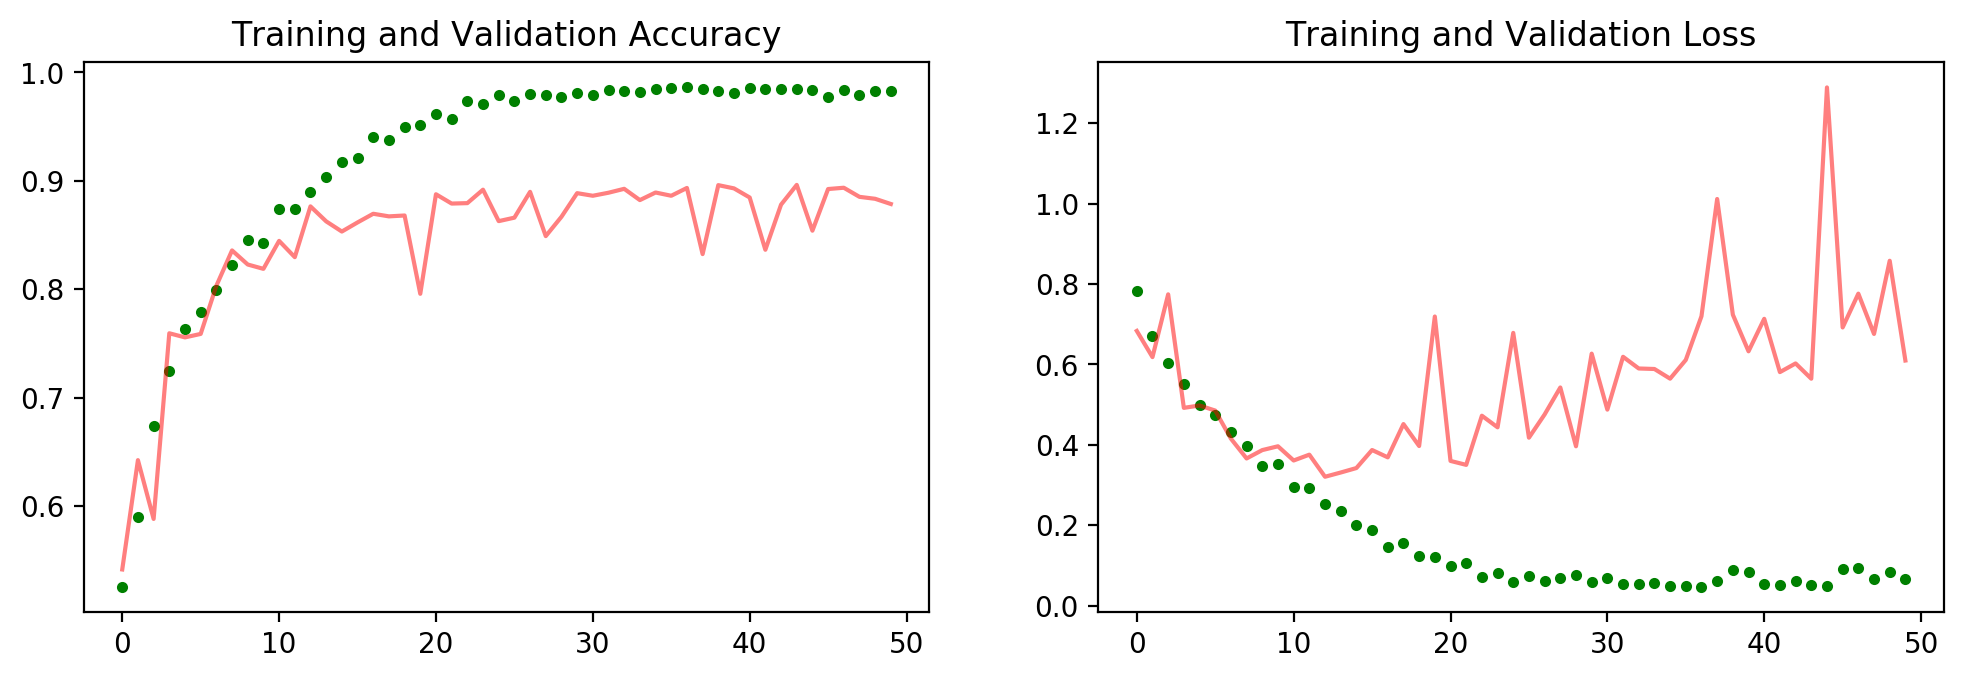

In [64]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

no_epochs = range(len(train_acc))

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(221)
plt.plot(no_epochs, train_acc, 'g.', label='Training Accuracy')
plt.plot(no_epochs, val_acc, 'r-', label='Validation Accuracy', alpha=0.5)
plt.title('Training and Validation Accuracy')
plt.legend

plt.subplot(222)
plt.plot(no_epochs, train_loss, 'g.', label='Training Loss')
plt.plot(no_epochs, val_loss, 'r-', label='Validation Loss', alpha=0.5)
plt.title('Training and Validation Loss')
plt.legend

plt.show()

We can surely see some overfitting during the validation phase. 

Even though the validation accuracy is somewhat manageable (is it really?), the increase in loss during validation is not looking good at all.

Looks like it would be really good if we stop well before epoch 15. But before decreasing the number of epochs and testing on the real test data, we can try out some regularization techniques like `Dropout` and also try augmenting the images and see what kind od results we get.

## Model with Dropout

It is basically the same model with a `Dropout` layer before the `Dense()` layer.

In [65]:
from keras import layers 
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', 
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [66]:
# compiling the model
model.compile(loss='binary_crossentropy',
             optimizer='RMSprop',
             metrics=['acc'])

## Augmenting Data and Training

In [67]:
train_data = ImageDataGenerator(rescale=1.0 / 255,
                               rotation_range=55,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)

train_gen_pipe = train_data.flow_from_directory(train_dir,
                        target_size=(150, 150),
                        batch_size=100,
                        class_mode='binary')

val_data = ImageDataGenerator(rescale=1.0 / 255)

val_gen_pipe = val_data.flow_from_directory(val_dir,
                                           target_size=(150, 150),
                                           batch_size=100,
                                           class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [68]:
# fitting model
history = model.fit_generator(train_gen_pipe,
                             steps_per_epoch=100,
                             epochs=50,
                             validation_data=val_gen_pipe,
                             validation_steps=50)

Epoch 1/50
100/100 [==============================] - ETA: 2:15 - loss: 0.6902 - acc: 0.560 - ETA: 1:16 - loss: 4.7258 - acc: 0.505 - ETA: 1:11 - loss: 3.4015 - acc: 0.496 - ETA: 1:08 - loss: 2.7239 - acc: 0.510 - ETA: 1:06 - loss: 2.3193 - acc: 0.500 - ETA: 1:04 - loss: 2.0470 - acc: 0.513 - ETA: 1:03 - loss: 1.8596 - acc: 0.514 - ETA: 1:01 - loss: 1.7138 - acc: 0.508 - ETA: 1:00 - loss: 1.6003 - acc: 0.513 - ETA: 58s - loss: 1.5102 - acc: 0.506 - ETA: 57s - loss: 1.4360 - acc: 0.50 - ETA: 57s - loss: 1.3740 - acc: 0.51 - ETA: 56s - loss: 1.3216 - acc: 0.51 - ETA: 55s - loss: 1.2767 - acc: 0.51 - ETA: 54s - loss: 1.2378 - acc: 0.51 - ETA: 53s - loss: 1.2037 - acc: 0.51 - ETA: 52s - loss: 1.1734 - acc: 0.51 - ETA: 52s - loss: 1.1460 - acc: 0.51 - ETA: 51s - loss: 1.1220 - acc: 0.51 - ETA: 50s - loss: 1.1011 - acc: 0.51 - ETA: 49s - loss: 1.0820 - acc: 0.50 - ETA: 48s - loss: 1.0643 - acc: 0.51 - ETA: 48s - loss: 1.0478 - acc: 0.51 - ETA: 47s - loss: 1.0344 - acc: 0.51 - ETA: 46s - loss

100/100 [==============================] - ETA: 18s - loss: 0.6183 - acc: 0.61 - ETA: 18s - loss: 0.6206 - acc: 0.64 - ETA: 18s - loss: 0.6106 - acc: 0.67 - ETA: 18s - loss: 0.6113 - acc: 0.68 - ETA: 18s - loss: 0.6180 - acc: 0.66 - ETA: 17s - loss: 0.6189 - acc: 0.65 - ETA: 17s - loss: 0.6152 - acc: 0.65 - ETA: 17s - loss: 0.6236 - acc: 0.65 - ETA: 17s - loss: 0.6189 - acc: 0.64 - ETA: 17s - loss: 0.6205 - acc: 0.64 - ETA: 16s - loss: 0.6160 - acc: 0.64 - ETA: 16s - loss: 0.6142 - acc: 0.64 - ETA: 16s - loss: 0.6121 - acc: 0.65 - ETA: 16s - loss: 0.6124 - acc: 0.64 - ETA: 16s - loss: 0.6135 - acc: 0.64 - ETA: 17s - loss: 0.6166 - acc: 0.63 - ETA: 19s - loss: 0.6203 - acc: 0.64 - ETA: 20s - loss: 0.6182 - acc: 0.64 - ETA: 21s - loss: 0.6188 - acc: 0.65 - ETA: 22s - loss: 0.6254 - acc: 0.64 - ETA: 23s - loss: 0.6261 - acc: 0.64 - ETA: 24s - loss: 0.6253 - acc: 0.64 - ETA: 24s - loss: 0.6243 - acc: 0.64 - ETA: 25s - loss: 0.6222 - acc: 0.65 - ETA: 25s - loss: 0.6205 - acc: 0.65 - ETA: 26

100/100 [==============================] - ETA: 18s - loss: 0.4973 - acc: 0.79 - ETA: 18s - loss: 0.5327 - acc: 0.73 - ETA: 18s - loss: 0.5278 - acc: 0.73 - ETA: 18s - loss: 0.5290 - acc: 0.73 - ETA: 18s - loss: 0.5625 - acc: 0.71 - ETA: 17s - loss: 0.5655 - acc: 0.70 - ETA: 17s - loss: 0.5805 - acc: 0.69 - ETA: 17s - loss: 0.5834 - acc: 0.69 - ETA: 17s - loss: 0.5826 - acc: 0.70 - ETA: 17s - loss: 0.5834 - acc: 0.70 - ETA: 17s - loss: 0.5829 - acc: 0.69 - ETA: 16s - loss: 0.5796 - acc: 0.69 - ETA: 16s - loss: 0.5736 - acc: 0.70 - ETA: 16s - loss: 0.5951 - acc: 0.69 - ETA: 16s - loss: 0.5941 - acc: 0.69 - ETA: 17s - loss: 0.5945 - acc: 0.69 - ETA: 19s - loss: 0.5969 - acc: 0.69 - ETA: 20s - loss: 0.5950 - acc: 0.69 - ETA: 21s - loss: 0.5942 - acc: 0.68 - ETA: 22s - loss: 0.5911 - acc: 0.68 - ETA: 23s - loss: 0.5916 - acc: 0.68 - ETA: 24s - loss: 0.5924 - acc: 0.68 - ETA: 24s - loss: 0.5919 - acc: 0.68 - ETA: 25s - loss: 0.5905 - acc: 0.68 - ETA: 25s - loss: 0.5887 - acc: 0.68 - ETA: 25

100/100 [==============================] - ETA: 18s - loss: 0.5088 - acc: 0.72 - ETA: 18s - loss: 0.5306 - acc: 0.72 - ETA: 18s - loss: 0.5499 - acc: 0.70 - ETA: 18s - loss: 0.5506 - acc: 0.70 - ETA: 18s - loss: 0.5548 - acc: 0.71 - ETA: 17s - loss: 0.5525 - acc: 0.72 - ETA: 17s - loss: 0.5525 - acc: 0.71 - ETA: 17s - loss: 0.5555 - acc: 0.71 - ETA: 17s - loss: 0.5553 - acc: 0.71 - ETA: 17s - loss: 0.5520 - acc: 0.71 - ETA: 17s - loss: 0.5550 - acc: 0.71 - ETA: 16s - loss: 0.5639 - acc: 0.71 - ETA: 16s - loss: 0.5626 - acc: 0.71 - ETA: 16s - loss: 0.5590 - acc: 0.71 - ETA: 16s - loss: 0.5547 - acc: 0.72 - ETA: 17s - loss: 0.5547 - acc: 0.72 - ETA: 19s - loss: 0.5564 - acc: 0.71 - ETA: 20s - loss: 0.5574 - acc: 0.71 - ETA: 21s - loss: 0.5561 - acc: 0.71 - ETA: 22s - loss: 0.5550 - acc: 0.71 - ETA: 23s - loss: 0.5551 - acc: 0.71 - ETA: 24s - loss: 0.5518 - acc: 0.72 - ETA: 24s - loss: 0.5495 - acc: 0.72 - ETA: 25s - loss: 0.5475 - acc: 0.72 - ETA: 25s - loss: 0.5439 - acc: 0.72 - ETA: 26

100/100 [==============================] - ETA: 18s - loss: 0.4942 - acc: 0.78 - ETA: 18s - loss: 0.4934 - acc: 0.78 - ETA: 18s - loss: 0.4847 - acc: 0.78 - ETA: 18s - loss: 0.4837 - acc: 0.77 - ETA: 18s - loss: 0.4826 - acc: 0.77 - ETA: 17s - loss: 0.4770 - acc: 0.76 - ETA: 17s - loss: 0.4861 - acc: 0.76 - ETA: 17s - loss: 0.4810 - acc: 0.76 - ETA: 17s - loss: 0.4797 - acc: 0.77 - ETA: 17s - loss: 0.4812 - acc: 0.77 - ETA: 17s - loss: 0.4914 - acc: 0.76 - ETA: 16s - loss: 0.4943 - acc: 0.75 - ETA: 16s - loss: 0.4947 - acc: 0.75 - ETA: 16s - loss: 0.4951 - acc: 0.75 - ETA: 16s - loss: 0.4948 - acc: 0.76 - ETA: 17s - loss: 0.4945 - acc: 0.76 - ETA: 19s - loss: 0.4948 - acc: 0.76 - ETA: 20s - loss: 0.5002 - acc: 0.75 - ETA: 21s - loss: 0.5014 - acc: 0.75 - ETA: 22s - loss: 0.5021 - acc: 0.75 - ETA: 23s - loss: 0.5061 - acc: 0.75 - ETA: 24s - loss: 0.5053 - acc: 0.75 - ETA: 24s - loss: 0.5047 - acc: 0.75 - ETA: 25s - loss: 0.5075 - acc: 0.75 - ETA: 25s - loss: 0.5033 - acc: 0.75 - ETA: 25

100/100 [==============================] - ETA: 18s - loss: 0.4727 - acc: 0.77 - ETA: 18s - loss: 0.4662 - acc: 0.79 - ETA: 18s - loss: 0.4593 - acc: 0.79 - ETA: 18s - loss: 0.4467 - acc: 0.79 - ETA: 18s - loss: 0.4599 - acc: 0.78 - ETA: 18s - loss: 0.4866 - acc: 0.76 - ETA: 17s - loss: 0.5123 - acc: 0.74 - ETA: 17s - loss: 0.5157 - acc: 0.74 - ETA: 17s - loss: 0.5155 - acc: 0.74 - ETA: 17s - loss: 0.5003 - acc: 0.75 - ETA: 17s - loss: 0.4972 - acc: 0.75 - ETA: 16s - loss: 0.5025 - acc: 0.75 - ETA: 16s - loss: 0.4993 - acc: 0.75 - ETA: 16s - loss: 0.4968 - acc: 0.75 - ETA: 16s - loss: 0.4901 - acc: 0.76 - ETA: 17s - loss: 0.4867 - acc: 0.76 - ETA: 19s - loss: 0.4840 - acc: 0.76 - ETA: 20s - loss: 0.4849 - acc: 0.76 - ETA: 21s - loss: 0.4828 - acc: 0.76 - ETA: 22s - loss: 0.4782 - acc: 0.77 - ETA: 23s - loss: 0.4731 - acc: 0.77 - ETA: 24s - loss: 0.4859 - acc: 0.76 - ETA: 24s - loss: 0.4972 - acc: 0.76 - ETA: 25s - loss: 0.4997 - acc: 0.75 - ETA: 25s - loss: 0.4998 - acc: 0.75 - ETA: 26

100/100 [==============================] - ETA: 18s - loss: 0.6068 - acc: 0.70 - ETA: 18s - loss: 0.6165 - acc: 0.65 - ETA: 18s - loss: 0.5726 - acc: 0.68 - ETA: 18s - loss: 0.5499 - acc: 0.70 - ETA: 18s - loss: 0.5224 - acc: 0.72 - ETA: 17s - loss: 0.4997 - acc: 0.73 - ETA: 17s - loss: 0.4908 - acc: 0.74 - ETA: 17s - loss: 0.4805 - acc: 0.75 - ETA: 17s - loss: 0.4694 - acc: 0.76 - ETA: 17s - loss: 0.4594 - acc: 0.77 - ETA: 17s - loss: 0.4565 - acc: 0.78 - ETA: 16s - loss: 0.4496 - acc: 0.78 - ETA: 16s - loss: 0.4579 - acc: 0.78 - ETA: 16s - loss: 0.4575 - acc: 0.78 - ETA: 16s - loss: 0.4527 - acc: 0.78 - ETA: 17s - loss: 0.4559 - acc: 0.78 - ETA: 19s - loss: 0.4547 - acc: 0.78 - ETA: 20s - loss: 0.4520 - acc: 0.79 - ETA: 21s - loss: 0.4710 - acc: 0.78 - ETA: 22s - loss: 0.4687 - acc: 0.78 - ETA: 23s - loss: 0.4672 - acc: 0.78 - ETA: 24s - loss: 0.4654 - acc: 0.78 - ETA: 24s - loss: 0.4638 - acc: 0.78 - ETA: 25s - loss: 0.4630 - acc: 0.78 - ETA: 25s - loss: 0.4633 - acc: 0.78 - ETA: 26

100/100 [==============================] - ETA: 18s - loss: 0.5070 - acc: 0.80 - ETA: 18s - loss: 0.6282 - acc: 0.74 - ETA: 18s - loss: 0.5894 - acc: 0.76 - ETA: 18s - loss: 0.5699 - acc: 0.75 - ETA: 18s - loss: 0.5446 - acc: 0.76 - ETA: 17s - loss: 0.5221 - acc: 0.77 - ETA: 17s - loss: 0.4959 - acc: 0.78 - ETA: 17s - loss: 0.4841 - acc: 0.79 - ETA: 17s - loss: 0.4725 - acc: 0.79 - ETA: 17s - loss: 0.4652 - acc: 0.79 - ETA: 17s - loss: 0.4598 - acc: 0.80 - ETA: 16s - loss: 0.4533 - acc: 0.80 - ETA: 16s - loss: 0.4446 - acc: 0.80 - ETA: 16s - loss: 0.4341 - acc: 0.81 - ETA: 16s - loss: 0.4311 - acc: 0.81 - ETA: 17s - loss: 0.4415 - acc: 0.81 - ETA: 19s - loss: 0.4521 - acc: 0.80 - ETA: 20s - loss: 0.4551 - acc: 0.80 - ETA: 21s - loss: 0.4512 - acc: 0.80 - ETA: 22s - loss: 0.4454 - acc: 0.81 - ETA: 23s - loss: 0.4446 - acc: 0.80 - ETA: 24s - loss: 0.4364 - acc: 0.81 - ETA: 24s - loss: 0.4321 - acc: 0.81 - ETA: 25s - loss: 0.4318 - acc: 0.81 - ETA: 25s - loss: 0.4297 - acc: 0.81 - ETA: 25

100/100 [==============================] - ETA: 18s - loss: 0.2721 - acc: 0.85 - ETA: 18s - loss: 0.2943 - acc: 0.85 - ETA: 18s - loss: 0.3642 - acc: 0.83 - ETA: 18s - loss: 0.3627 - acc: 0.82 - ETA: 18s - loss: 0.3558 - acc: 0.82 - ETA: 18s - loss: 0.4007 - acc: 0.81 - ETA: 17s - loss: 0.3979 - acc: 0.82 - ETA: 17s - loss: 0.3839 - acc: 0.83 - ETA: 17s - loss: 0.4062 - acc: 0.82 - ETA: 17s - loss: 0.4185 - acc: 0.81 - ETA: 17s - loss: 0.4246 - acc: 0.81 - ETA: 16s - loss: 0.4181 - acc: 0.81 - ETA: 16s - loss: 0.4123 - acc: 0.82 - ETA: 16s - loss: 0.4096 - acc: 0.82 - ETA: 16s - loss: 0.4096 - acc: 0.81 - ETA: 17s - loss: 0.4060 - acc: 0.81 - ETA: 19s - loss: 0.4001 - acc: 0.82 - ETA: 20s - loss: 0.3954 - acc: 0.82 - ETA: 21s - loss: 0.3920 - acc: 0.82 - ETA: 22s - loss: 0.3969 - acc: 0.82 - ETA: 23s - loss: 0.3994 - acc: 0.81 - ETA: 24s - loss: 0.3976 - acc: 0.82 - ETA: 24s - loss: 0.3950 - acc: 0.82 - ETA: 25s - loss: 0.3949 - acc: 0.82 - ETA: 25s - loss: 0.3962 - acc: 0.82 - ETA: 26

100/100 [==============================] - ETA: 18s - loss: 0.3579 - acc: 0.84 - ETA: 18s - loss: 0.4215 - acc: 0.79 - ETA: 18s - loss: 0.4426 - acc: 0.80 - ETA: 18s - loss: 0.4217 - acc: 0.81 - ETA: 18s - loss: 0.4168 - acc: 0.82 - ETA: 18s - loss: 0.4306 - acc: 0.82 - ETA: 17s - loss: 0.4295 - acc: 0.81 - ETA: 17s - loss: 0.4251 - acc: 0.81 - ETA: 17s - loss: 0.4217 - acc: 0.81 - ETA: 17s - loss: 0.4139 - acc: 0.82 - ETA: 17s - loss: 0.4082 - acc: 0.82 - ETA: 16s - loss: 0.4052 - acc: 0.82 - ETA: 16s - loss: 0.4045 - acc: 0.82 - ETA: 16s - loss: 0.4075 - acc: 0.81 - ETA: 16s - loss: 0.4094 - acc: 0.81 - ETA: 17s - loss: 0.4064 - acc: 0.81 - ETA: 19s - loss: 0.4083 - acc: 0.81 - ETA: 20s - loss: 0.4087 - acc: 0.81 - ETA: 21s - loss: 0.4060 - acc: 0.81 - ETA: 22s - loss: 0.4050 - acc: 0.81 - ETA: 23s - loss: 0.3994 - acc: 0.82 - ETA: 24s - loss: 0.3992 - acc: 0.82 - ETA: 24s - loss: 0.3962 - acc: 0.82 - ETA: 25s - loss: 0.3925 - acc: 0.82 - ETA: 25s - loss: 0.3872 - acc: 0.83 - ETA: 26

100/100 [==============================] - ETA: 18s - loss: 0.3482 - acc: 0.85 - ETA: 18s - loss: 0.3147 - acc: 0.87 - ETA: 18s - loss: 0.3394 - acc: 0.86 - ETA: 18s - loss: 0.3673 - acc: 0.84 - ETA: 18s - loss: 0.3793 - acc: 0.83 - ETA: 18s - loss: 0.3836 - acc: 0.82 - ETA: 18s - loss: 0.3710 - acc: 0.82 - ETA: 17s - loss: 0.3638 - acc: 0.83 - ETA: 17s - loss: 0.3559 - acc: 0.84 - ETA: 17s - loss: 0.3522 - acc: 0.84 - ETA: 17s - loss: 0.3531 - acc: 0.84 - ETA: 17s - loss: 0.3550 - acc: 0.84 - ETA: 16s - loss: 0.3576 - acc: 0.84 - ETA: 16s - loss: 0.3543 - acc: 0.84 - ETA: 17s - loss: 0.3525 - acc: 0.84 - ETA: 20s - loss: 0.3472 - acc: 0.84 - ETA: 21s - loss: 0.3501 - acc: 0.84 - ETA: 23s - loss: 0.3553 - acc: 0.84 - ETA: 24s - loss: 0.3631 - acc: 0.83 - ETA: 25s - loss: 0.3675 - acc: 0.83 - ETA: 26s - loss: 0.3703 - acc: 0.83 - ETA: 27s - loss: 0.3755 - acc: 0.83 - ETA: 27s - loss: 0.3719 - acc: 0.83 - ETA: 28s - loss: 0.3695 - acc: 0.83 - ETA: 28s - loss: 0.3666 - acc: 0.83 - ETA: 28

100/100 [==============================] - ETA: 18s - loss: 0.3220 - acc: 0.87 - ETA: 18s - loss: 0.2588 - acc: 0.90 - ETA: 18s - loss: 0.2527 - acc: 0.88 - ETA: 18s - loss: 0.3622 - acc: 0.86 - ETA: 18s - loss: 0.4022 - acc: 0.82 - ETA: 18s - loss: 0.4003 - acc: 0.83 - ETA: 17s - loss: 0.3956 - acc: 0.83 - ETA: 17s - loss: 0.3960 - acc: 0.82 - ETA: 17s - loss: 0.3823 - acc: 0.83 - ETA: 17s - loss: 0.3835 - acc: 0.83 - ETA: 17s - loss: 0.3843 - acc: 0.82 - ETA: 16s - loss: 0.3786 - acc: 0.83 - ETA: 16s - loss: 0.3842 - acc: 0.83 - ETA: 16s - loss: 0.3831 - acc: 0.83 - ETA: 16s - loss: 0.3796 - acc: 0.83 - ETA: 18s - loss: 0.3818 - acc: 0.83 - ETA: 20s - loss: 0.3783 - acc: 0.83 - ETA: 21s - loss: 0.3753 - acc: 0.83 - ETA: 23s - loss: 0.3684 - acc: 0.84 - ETA: 24s - loss: 0.3675 - acc: 0.83 - ETA: 25s - loss: 0.3651 - acc: 0.83 - ETA: 25s - loss: 0.3678 - acc: 0.83 - ETA: 26s - loss: 0.3676 - acc: 0.83 - ETA: 26s - loss: 0.3695 - acc: 0.83 - ETA: 27s - loss: 0.3678 - acc: 0.83 - ETA: 27

100/100 [==============================] - ETA: 18s - loss: 0.2510 - acc: 0.88 - ETA: 18s - loss: 0.2682 - acc: 0.88 - ETA: 18s - loss: 0.2692 - acc: 0.87 - ETA: 18s - loss: 0.2673 - acc: 0.87 - ETA: 18s - loss: 0.2719 - acc: 0.87 - ETA: 18s - loss: 0.2955 - acc: 0.86 - ETA: 17s - loss: 0.3380 - acc: 0.84 - ETA: 17s - loss: 0.3568 - acc: 0.82 - ETA: 17s - loss: 0.3470 - acc: 0.84 - ETA: 17s - loss: 0.3512 - acc: 0.84 - ETA: 17s - loss: 0.3617 - acc: 0.83 - ETA: 16s - loss: 0.3657 - acc: 0.83 - ETA: 16s - loss: 0.3638 - acc: 0.83 - ETA: 16s - loss: 0.3562 - acc: 0.83 - ETA: 16s - loss: 0.3492 - acc: 0.84 - ETA: 18s - loss: 0.3503 - acc: 0.84 - ETA: 19s - loss: 0.3616 - acc: 0.84 - ETA: 21s - loss: 0.3673 - acc: 0.83 - ETA: 22s - loss: 0.3664 - acc: 0.83 - ETA: 23s - loss: 0.3622 - acc: 0.84 - ETA: 24s - loss: 0.3582 - acc: 0.84 - ETA: 25s - loss: 0.3522 - acc: 0.84 - ETA: 25s - loss: 0.3564 - acc: 0.84 - ETA: 26s - loss: 0.3603 - acc: 0.84 - ETA: 27s - loss: 0.3588 - acc: 0.84 - ETA: 27

In [69]:
# saving the model
model.save('cats_vs_dogs2.h5')

In [70]:
print('Mean training accuracy: ', np.mean(history.history['acc']))
print('Mean validation accuracy: ', np.mean(history.history['val_acc']))

Mean training accuracy:  0.7698459989130497
Mean validation accuracy:  0.8103399999976157


Interesting. We are getting more validation accuracy than training accuracy. 
Let's look at the plots.

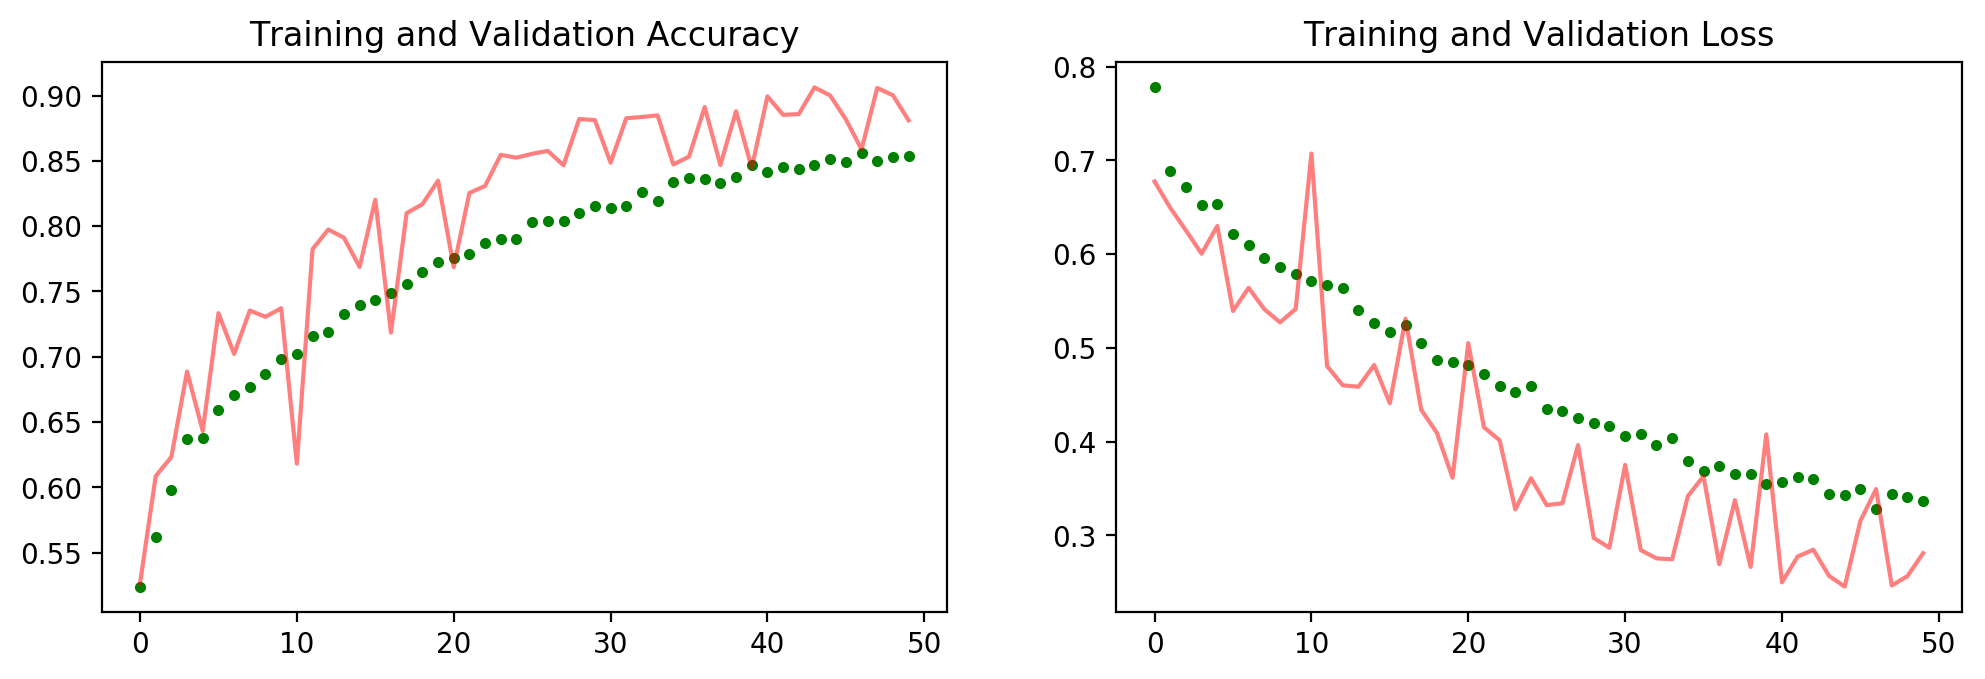

In [71]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

no_epochs = range(len(train_acc))

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(221)
plt.plot(no_epochs, train_acc, 'g.', label='Training Accuracy')
plt.plot(no_epochs, val_acc, 'r-', label='Validation Accuracy', alpha=0.5)
plt.title('Training and Validation Accuracy')
plt.legend

plt.subplot(222)
plt.plot(no_epochs, train_loss, 'g.', label='Training Loss')
plt.plot(no_epochs, val_loss, 'r-', label='Validation Loss', alpha=0.5)
plt.title('Training and Validation Loss')
plt.legend

plt.show()

## Loading the Models and Predicting on New Data

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model1 = load_model('cats_vs_dogs1.h5')
model2 = load_model('cats_vs_dogs2.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# setting up test direcotory
test_dir = 'test_gen'

if not os.path.exists(test_dir):
    os.makedirs(test_dir)
    
test_dir_animals = os.path.join(test_dir, 'test_dir_animals')

if not os.path.exists(test_dir_animals):
    os.makedirs(test_dir_animals)

In [75]:
# copying the images
from tqdm import tqdm
import shutil
from shutil import copyfile

initial_dir = 'test1'

# cat images for training directory
names = ['{}.jpg'.format(i + 1) for i in range(12500)]
for name in tqdm(names):
    src = os.path.join(initial_dir, name)
    dst = os.path.join(test_dir_animals, name)
    shutil.copyfile(src, dst)

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:56<00:00, 222.73it/s]


In [6]:
# preprocessing the test data
test_data = ImageDataGenerator(rescale=1.0 / 255)

test_gen_pipe = test_data.flow_from_directory(test_dir,
                        target_size=(150, 150),
                        batch_size=100,
                        class_mode=None,
                        shuffle=False)

Found 12500 images belonging to 1 classes.


Now let us predicting the values using the models for a final time and see the results.

### Predicting

In [7]:
filenames = os.listdir("test_gen/test_dir_animals")
submission = pd.DataFrame({
    'filename': filenames
})

# print(filenames)
no_files = len(filenames)
no_files

12500

In [8]:
predict1 = model1.predict_generator(test_gen_pipe, steps=np.ceil(no_files/100)) # no_files / batch_size

In [9]:
predict1

array([[9.9999905e-01],
       [0.0000000e+00],
       [6.9013238e-04],
       ...,
       [9.7038198e-01],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

Now to categorize between dogs and cats, we have to get the predictions as 0s and 1s.

In [14]:
# labeled as 0 or 1
submission_final = pd.DataFrame()
divide = 0.5
submission_final['id'] = submission['filename'].str.split('.').str[0]
submission_final['label'] = np.where(predict1 > divide, 1,0)

In [15]:
submission_final.to_csv('submission.csv', index=False)

In [16]:
# labels are percentages
submission_final = pd.DataFrame()
divide = 0.5
submission_final['id'] = submission['filename'].str.split('.').str[0]
submission_final['label'] = predict1

submission_final.to_csv('submission_perc.csv', index=False)